In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv("data/StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
X = df.drop(columns=['math score'], axis=1)
y= df['math score']


In [15]:
num_features = X.select_dtypes(exclude = "object").columns
cat_features = X.select_dtypes(include = "object").columns

In [16]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

In [17]:
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",num_transformer,num_features),
    ]
)

In [18]:
X = preprocessor.fit_transform(X)

In [19]:
X.shape

(1000, 19)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [23]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mae, rmse, r2_square

In [26]:
models = {
    "Linear Regression":LinearRegression(),
    "Lasso": Lasso(),
    "Ridge":Ridge(),
    "K-neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Catboost Regressor": CatBoostRegressor(verbose=False),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "XgBoost Regressor": XGBRegressor()
    
}
model_list= []
r2_list = []

In [30]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    #make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    model_train_mae, model_train_rmse, model_train_r2_score = evaluate_model(y_train,y_train_pred)
    
    model_test_mae, model_test_rmse, model_test_r2_score = evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model performance for training set")
    print(f"Mean absolute err: {model_train_mae}")
    print(f"Root mean squarred err: {model_train_rmse}")
    print(f"r2_score: {model_train_r2_score}")
    print("------------------------------------------")
    print("Model performance for testing set")
    print(f"Mean absolute err: {model_test_mae}")
    print(f"Root mean squarred err: {model_test_rmse}")
    print(f"r2_score: {model_test_r2_score}")
    r2_list.append(model_test_r2_score)
    
    print("="*35)
    print("\n")

Linear Regression
Model performance for training set
Mean absolute err: 4.271484375
Root mean squarred err: 5.329287354885032
r2_score: 0.874022530822051
------------------------------------------
Model performance for testing set
Mean absolute err: 4.2221875
Root mean squarred err: 5.425185408698029
r2_score: 0.8790464771743793


Lasso
Model performance for training set
Mean absolute err: 5.206302661246526
Root mean squarred err: 6.593815587795565
r2_score: 0.8071462015863458
------------------------------------------
Model performance for testing set
Mean absolute err: 5.157881810347763
Root mean squarred err: 6.519694535667419
r2_score: 0.8253197323627853


Ridge
Model performance for training set
Mean absolute err: 4.264987823725981
Root mean squarred err: 5.323324922741654
r2_score: 0.8743042615212909
------------------------------------------
Model performance for testing set
Mean absolute err: 4.21110068801426
Root mean squarred err: 5.390387016935637
r2_score: 0.880593148502873

In [31]:
pd.DataFrame(list(zip(model_list,r2_list)), columns =['model name', 'R2_Score']).sort_values(by = ['R2_Score'],ascending=False)

,model name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879046
5,Catboost Regressor,0.851632
6,Random Forest Regressor,0.851092
7,AdaBoost Regressor,0.841300
1,Lasso,0.825320
8,XgBoost Regressor,0.821589
3,K-neighbors Regressor,0.783813
4,Decision Tree Regressor,0.725506


Linear Regression

In [32]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 0.88


Text(0, 0.5, 'predicted')

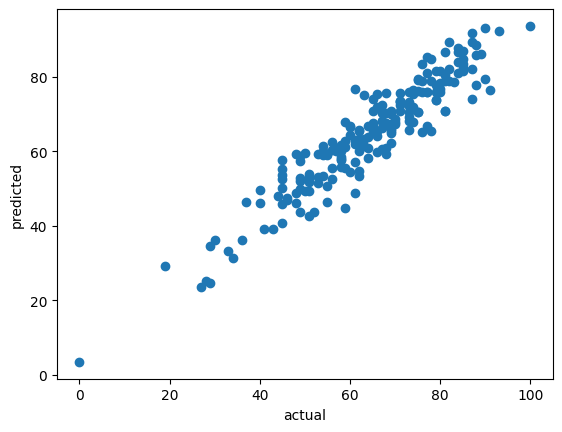

In [33]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual")
plt.ylabel("predicted")


<Axes: xlabel='math score'>

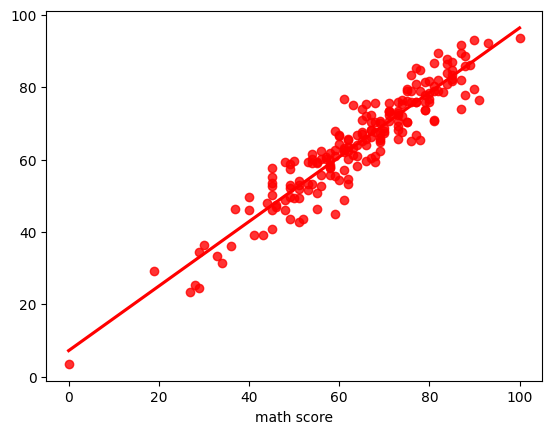

In [35]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [36]:
pred_df = pd.DataFrame({'Actual value':y_test, "Predicted value":y_pred,"Difference":y_test-y_pred})
pred_df

,Actual value,Predicted value,Difference
521,91,76.4375,14.5625
737,53,59.3125,-6.3125
740,80,76.6250,3.3750
660,74,76.5625,-2.5625
411,84,87.7500,-3.7500
...,...,...,...
408,52,43.6875,8.3125
332,62,62.3125,-0.3125
208,74,67.7500,6.2500
613,65,67.0000,-2.0000
